# Notebook 01: Adquisición y Primera Inspección de Datos 

## Indice 
1. [Objetivo](#objetivo)
2. [Información del Dataset](#info-datset)
3. [Carga de Datos](#carga)
4. [Inspección Inicial](#inspeccion)
5. [Validación de Calidad](#calidad)
6. [Conclusiones](#conclusiones)

## Objetivo

**¿Qué hago en este notebook?**
- Descargar/cargar el Dataset Pima Indians Diabetes
- Realizar primera inspección de estructura y contenido
- Validar calidad basica de los datos
- Identificar problemas potenciales para próximos pasos

**¿Por qué es importante?**
- Conocer los datos es el fundamento de cualquier análisis
- Detectar problemas temprano ahorra tiempo después
- Documentar el origen y características de los datos

**Entregables:**
- Dataset cargado y guardado en 'data/raw'
- Reporte de estructura y calidad
- Identificación de próximos pasos
  

## Información del Dataset

### Pima Indians Diabetes Database

**Origen:**
- National Institute of Diabetes and Digestive and Kidney Diseases
- Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988)

**Población:**
- Mujeres de la tribu Pima (Arizona, USA)
- Edad: ≥ 21 años
- Período: 1900s

**Propósito Original:**
- Investigar factores de risgo de diabetes tipo 2
- Los Pima tienen alta incidencia de diabetes (genética + estilo de vida)

**Variables (8 predictorias + 1 target):**

| Variable | Descripción | Unidad | Tipo |
|----------|-------------|--------|------|
| Pregnancies | Número de embarazos | count | int |
| Glucose | Concentración de glucosa (2h prueba tolerancia) | mg/dL | int |
| BloodPressure | Presión arterial diastólica | mmHg | int |
| SkinThickness | Grosor pliegue cutáneo tricipital | mm | int |
| Insulin | Insulina sérica (2h) | μU/mL | int |
| BMI | Índice de masa corporal | kg/m² | float |
| DiabetesPedigreeFunction | Función de pedigrí diabético* | - | float |
| Age | Edad | años | int |
| **Outcome** | **Diabetes (0=No, 1=Sí)** | **binario** | **int** |

*DiabetesPedigreeFunction: Score que representa la probabilidad de diabetes basado en historia familiar*


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pathlib import Path
import os 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] =  10


## Carga de Datos 

OPCIÓN 1: Cargar desde el archivo local.

In [3]:
DATA_DIR = Path('../data/raw')
DATA_FILE = DATA_DIR / 'diabetes.csv'

if DATA_FILE.exists():
    df = pd.read_csv(DATA_FILE)
else: 
    print('Archivo no encontrado')
    print('Descargando desde fuente alternativa...')


OPCIÓN 2: Descargar desde la URL (backup)

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure',
           'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']


try:
    df = pd.read_csv(url,names=columns)
    print(f'Dataset descargado y guardado en: {DATA_FILE}')
    # Crear directorio si no existe
    DATA_DIR.mkdir(parents=True, exist_ok=True)

    df.to_csv(DATA_FILE, index=False)
except Exception as e:
    print(f'Error al descargar: {e}')
    raise

Dataset descargado y guardado en: ..\data\raw\diabetes.csv


## Inspección Inicial

1. PRIMERAS FILAS

In [5]:
print('PRIMERAS 10 OBSERVACIONES')
display(df.head(10))

PRIMERAS 10 OBSERVACIONES


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
5,5,116,74,0,0,25.6,0.20,30,0
6,3,78,50,32,88,31.0,0.25,26,1
7,10,115,0,0,0,35.3,0.13,29,0
8,2,197,70,45,543,30.5,0.16,53,1
9,8,125,96,0,0,0.0,0.23,54,1


2. ÚLTIMAS FILAS (verificar que todo está completo)

In [6]:
print("ÚLTIMAS 5 OBSERVACIONES")
display(df.tail())

ÚLTIMAS 5 OBSERVACIONES


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1
767,1,93,70,31,0,30.4,0.32,23,0


3. INFORMACIÓN GENERAL

In [7]:
print("\nINFORMACIÓN GENERAL DEL DATASET")
print(f'Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas')
print(f'Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'Variables numéricas: {df.select_dtypes(include=[np.number]).shape[1]}')
print(f'Variables categoricas: {df.select_dtypes(include=['object']).shape[1]}')

print('\nINFORMACIÓN DETALLADA')
df.info()


INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 768 filas x 9 columnas
Memoria: 0.05 MB
Variables numéricas: 9
Variables categoricas: 0

INFORMACIÓN DETALLADA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


4. TIPOS DE DATOS Y VALORES NULOS

In [8]:
print('ANÁLISIS DE TIPOS Y CALIDAD DE DATOS')

info_df = pd.DataFrame({
    'Tipo': df.dtypes,
    'No_Nulos': df.notna().sum(),
    'Nulos': df.isna().sum(),
    '%_Nulos': (df.isna().sum() / len(df) * 100).round(2),
    'Valores_Unicos': df.nunique(),
    'Ejemplo': [df[col].iloc[0] for col in df.columns]
})

display(info_df)


ANÁLISIS DE TIPOS Y CALIDAD DE DATOS


,Tipo,No_Nulos,Nulos,%_Nulos,Valores_Unicos,Ejemplo
Pregnancies,int64,768,0,0.0,17,6.00
Glucose,int64,768,0,0.0,136,148.00
BloodPressure,int64,768,0,0.0,47,72.00
SkinThickness,int64,768,0,0.0,51,35.00
Insulin,int64,768,0,0.0,186,0.00
BMI,float64,768,0,0.0,248,33.60
DiabetesPedigreeFunction,float64,768,0,0.0,517,0.63
Age,int64,768,0,0.0,52,50.00
Outcome,int64,768,0,0.0,2,1.00


5. ESTADÍSTICAS DESCRIPTIVAS 

In [9]:
print('ESTADÍSTICAS DESCRIPTIVAS')
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['CV'] = (stats['std'] / stats['mean'] * 100).round(2)  # Coeficiente de variación

stats = stats.sort_values('mean', ascending=False)

display(stats)

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max,IQR,CV
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00,41.25,26.45
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00,127.25,144.42
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00,18.00,28.01
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00,17.00,35.38
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10,9.30,24.64
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00,32.00,77.68
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00,5.00,87.63
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42,0.38,70.22
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00,1.00,136.68


6. DISTRIBUCIÓN DE LA VARIABLE TARGET

In [10]:
print('ANÁLISIS DE LA VARIABLE OBJETIVO: OUTCOME')

target_counts = df['Outcome'].value_counts().sort_index()
target_pct = df['Outcome'].value_counts(normalize=True).sort_index() * 100
print('Distribución:')
print(f'No Diabeticas (0): {target_counts[0]:3d}({target_pct[0]:.1f}%)')
print(f'Diabeticas (1): {target_counts[1]:3d}({target_pct[1]:.1f}%)')
print(f'Ratio Desbalanceo: 1:{(target_counts[0] / target_counts[1]):.2f}')
print(f"(Por cada paciente diabética hay {(target_counts[0]/target_counts[1]):.1f} no diabéticas)")

ANÁLISIS DE LA VARIABLE OBJETIVO: OUTCOME
Distribución:
No Diabeticas (0): 500(65.1%)
Diabeticas (1): 268(34.9%)
Ratio Desbalanceo: 1:1.87
(Por cada paciente diabética hay 1.9 no diabéticas)


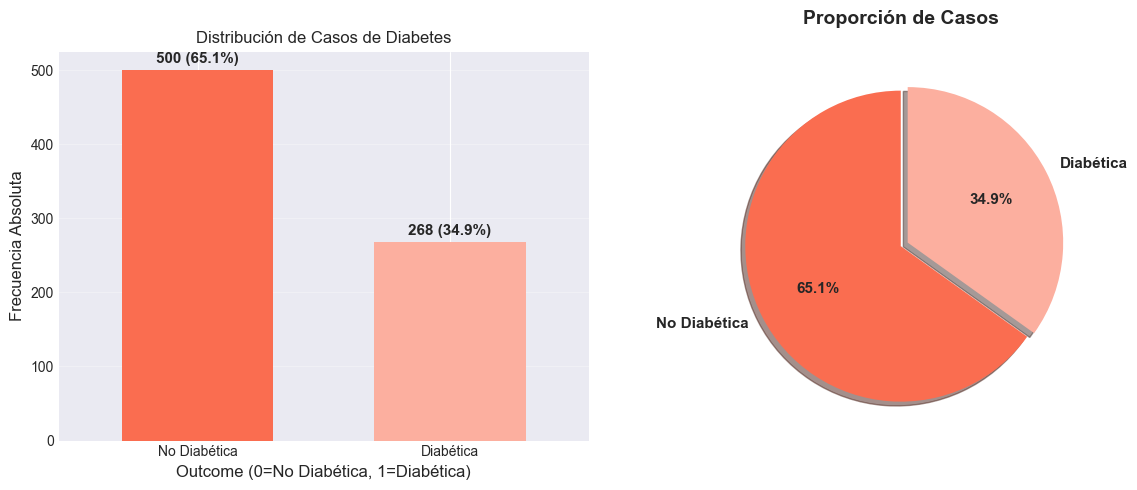

Gráfico guardado en: reports/figures/01_target_distribution.png


In [11]:
# Visualización
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Gráfico de barras
colors = ["#FA6D50","#FCAF9F"]
bars = target_counts.plot(kind='bar', ax=axes[0], color=colors, width=0.6)
axes[0].set_title('Distribución de Casos de Diabetes')
axes[0].set_xlabel('Outcome (0=No Diabética, 1=Diabética)', fontsize=12)
axes[0].set_ylabel('Frecuencia Absoluta', fontsize=12)
axes[0].set_xticklabels(['No Diabética', 'Diabética'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (idx,val) in enumerate(target_counts.items()):
    axes[0].text(i,val + 10, f'{val} ({target_pct[idx]:.1f}%)',
        ha='center', fontsize=11, fontweight='bold')

# Grafico circular 
axes[1].pie(target_counts, labels=["No Diabética","Diabética"],
           autopct='%1.1f%%', startangle=90, colors=colors,
           explode=(0,0.05), shadow=True, textprops={'fontsize':11,'fontweight':'bold'})
axes[1].set_title('Proporción de Casos', fontsize=14,fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../reports/figures/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Gráfico guardado en: reports/figures/01_target_distribution.png")

### INSIGHT CRÍTICO: Desbalnceo de Clases

**Hallazgo** El dataset esta desbalanceado (65% vs 35%)

**Por qué importa?** 
- Un modelo "torpe" que siempre prediga "No Diabética" tendría un 65% de accuracy
- Accuracy no es una buena metrica para este problema
- Necesitamos enfocarnos en el Recall (capturar diabéticas) Y Precision

**Acciones para modelado**
1. Usar metricas apropiadas: AUC-ROC, Recall, Precision, F1
2. Considerar tecnicas de balanceo (SMOTE, class_weight)
3. Usar validación estratificada (mantener proporciónes de train/test)
4. Analizar matriz de confución detalladamente


## Validación de Calidad 

7. DETECCIÓN DE VALORES IMPOSIBLES 

DETECIÓN DE VALORES IMPOSIBLES O SOSPECHOSOS
Valores que no deberian ser 0:
Glucose: 5 ceros (0.7%)
BloodPressure: 35 ceros (4.6%)
SkinThickness: 227 ceros (29.6%)
Insulin: 374 ceros (48.7%)
BMI: 11 ceros (1.4%)


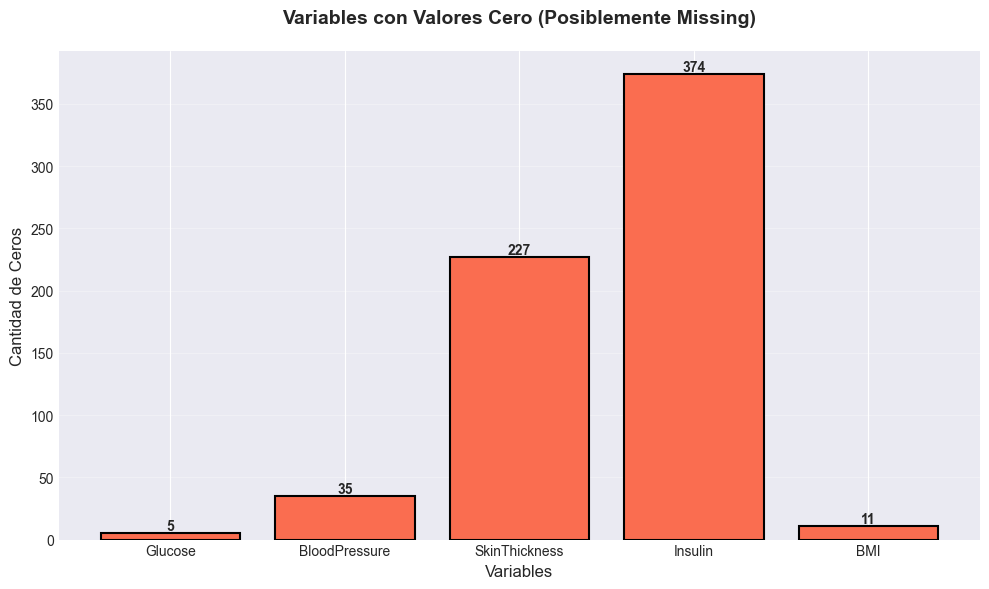


Gráfico guardado en: reports/figures/01_zero_values.png


In [12]:
print("DETECIÓN DE VALORES IMPOSIBLES O SOSPECHOSOS")

# Algunas variables no pueden ser 0 biológicamente
cannot_be_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

print("Valores que no deberian ser 0:")
for col in cannot_be_zero:
    zeros = (df[col]==0).sum()
    pct = (zeros / len(df) *100)
    if zeros > 0:
        print(f"{col}: {zeros} ceros ({pct:.1f}%)")


# Visualizar 
fig, ax = plt.subplots(figsize=(10,6))
zero_counts = [(df[col] == 0).sum() for col in cannot_be_zero]
colors_bars = ["#FA6D50" if c > 0 else "#FCAF9F" for c in zero_counts]

bars = ax.bar(cannot_be_zero, zero_counts, color=colors_bars, edgecolor='black', linewidth=1.5)
ax.set_title("Variables con Valores Cero (Posiblemente Missing)", 
            fontsize=14,fontweight='bold', pad=20)
ax.set_xlabel("Variables",fontsize=12)
ax.set_ylabel("Cantidad de Ceros",fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Agregar valores en barras 
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
               ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.savefig('../reports/figures/01_zero_values.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico guardado en: reports/figures/01_zero_values.png")

### PROBLEMA IDENTIFICADO: Valores Cero como Missing 

**Hallazgo:**
- 5 variables tienen valores 0 que son biológicamente imposibles
- Estos NO son verdaderos ceros, son "valores faltantes codificados como 0"
- Insulin es el más afectado con un (48.7%)

**Impacto:**
- Si los dejamos como 0 distorcionamos las estadísticas y modelos
- Debemos tratarlos como valores faltantes (NaN)

**Solución:**
- Reemplazar 0 -> NaN en estas variables
- Aplicar inputación inteligente (media, mediana, KNN, etc.)

8. DETECCIÓN DE OUTLIERS (Método IQR)

In [15]:
print("DETECCIÓN PRELIMINAR DE OUTLIERS (Regla IQR)")

def detect_outliers_iqr(data,column):
    '''Detecta outliers usando el método IQR (Interquaitile Range)'''
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nVariable           | Outliers | Límite Inferior | Límite Superior")


outlier_summary = {}
for col in df.select_dtypes(include=[np.number]).columns:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary[col] = n_outliers
    print(f"{col:18s} | {n_outliers:8d} | {lower:15.2f} | {upper:15.2f}")

# Visualizar variables con más outliers
top_outliers = pd.Series(outlier_summary).sort_values(ascending=False).head(5)
print("\nVariables con mas outliers:")
for var, count in top_outliers.items():
    print(f"{var}: {count} outliers")
    

DETECCIÓN PRELIMINAR DE OUTLIERS (Regla IQR)

Variable           | Outliers | Límite Inferior | Límite Superior
Pregnancies        |        4 |           -6.50 |           13.50
Glucose            |        5 |           37.12 |          202.12
BloodPressure      |       45 |           35.00 |          107.00
SkinThickness      |        1 |          -48.00 |           80.00
Insulin            |       34 |         -190.88 |          318.12
BMI                |       19 |           13.35 |           50.55
DiabetesPedigreeFunction |       29 |           -0.33 |            1.20
Age                |        9 |           -1.50 |           66.50
Outcome            |        0 |           -1.50 |            2.50

Variables con mas outliers:
BloodPressure: 45 outliers
Insulin: 34 outliers
DiabetesPedigreeFunction: 29 outliers
BMI: 19 outliers
Age: 9 outliers


## Conclusiones y Próximos Pasos

### Resumen de Hallazgos 

**1. Dataset Cargado Exitosamente:**
- 768 observaciones x 9 variables
- Todas numéricas (facilita procesamiento)
- Sin valores nulos explícitos (NaN)

**2. Variable Target (Outcome):**
- Desbalanceada: 65% No Diabética vs 35% Diabética
- Ratio 1:1.86
- Requiere métricas especiales y posible balanceo

**3. Problemas de Calidad Identificados:**
| Problema | Variables Afectadas | Severidad |
|----------|---------------------|-----------|
| Valores 0 como missing | Glucose, BloodPressure, SkinThickness, Insulin, BMI | ALTA |
| Outliers potenciales | Insulin (49), SkinThickness(46), Pregnancies(41) | MEDIA |

**4. Características Del Dataset:**
- Población: Mujeres Pima >= 21 años
- Período: 1900s
- Objetivo: Predicción de diabetes tipo 2
- Variables: Clínicas + Demográficas

### Próximos Pasos (Notebook 02 - EDA)

1. **Análisis Exploratorio Profundo:**
   - Distribuciones de cada variable
   - Correlaciones entre variables
   - Relación de cada feature con target
   - Análisis por grupos (diabéticas vs no diabéticas)
2. **Visualizaciones a Crear:**
   - Histogramas + KDE
   - Boxplots para outliers
   - Heatmap de correlaciones
   - Pair plots
   - Violin plots por grupo
3. **Análisis Específicos:**
   - Impacto de la edad en diabetes
   - Relación IMC-Glucosa-Diabetes
   - Efecto de embarazos
   - Análisis del pedigrí diabético

### Archivos Generados
- `data/raw/diabetes.csv` - Dataset original
- `reports/figures/01_target_distribution.png` - Distribución target
-  `reports/figures/01_zero_values.png` - Análisis de ceros


In [17]:
# Guardar copia del dataset original (sin modificaciones)

OUTPUT_PATH = Path('../data/raw/diabetes_original.csv')
df.to_csv(OUTPUT_PATH, index=False)
print(f"\nCopia de seguridad guardada en: {OUTPUT_PATH}")


Copia de seguridad guardada en: ..\data\raw\diabetes_original.csv
